In [1]:
import sys
import scanpy as sc
import scFates as scf
import scvelo as scv
import numpy as np
import pandas as pd
sc.settings.verbosity=3
sc.set_figure_params(dpi=150)
from scripts.eval_util import *

In [2]:
adata_all=sc.read("adata_ML6-7_velo.h5ad")

In [3]:
adata_all.obs["cell-type"]=adata_all.obs.leiden.cat.rename_categories(["Olfactory epi.",
                                        "Forebrain epi. A",
                                        "Forebrain epi. B",
                                        "Periderm-like",
                                        "Erythrocytes",
                                        "NCC",
                                        "Surface epi.",
                                        "Olf. assoc. neurons A",
                                        "Oral cavity epi.",
                                        "Epi. λ fusion eff.",
                                        "Mesenchymes",
                                        "Olf. assoc. neurons B",
                                        "Cartilage proge."])
adata_all.uns["cell-type_colors"] = adata_all.uns["leiden_colors"] # transfer custom palette

# Velocity of Mutant dataset

In [4]:
adata=adata_all[adata_all.obs.batch=="ML6"]

## Feature filtering

In [5]:
scv.pp.filter_and_normalize(adata, min_counts=20, min_counts_u=10, n_top_genes=5000)

Trying to set attribute `.obs` of view, copying.


Filtered out 41240 genes that are detected 20 counts (spliced).
Filtered out 2526 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Extracted 5000 highly variable genes.
Logarithmized X.


## Velocity modelling

In [6]:
scv.pp.moments(adata,n_neighbors=15)
scv.tl.velocity(adata)
scv.tl.recover_dynamics(adata,n_jobs=70)

computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:08)
computing neighbors
    finished (0:00:15) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
recovering dynamics (using 70/88 cores)


  0%|          | 0/860 [00:00<?, ?gene/s]

    finished (0:00:29) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [7]:
scv.tl.velocity(adata,mode="dynamical")

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [8]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Velocity plotting

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


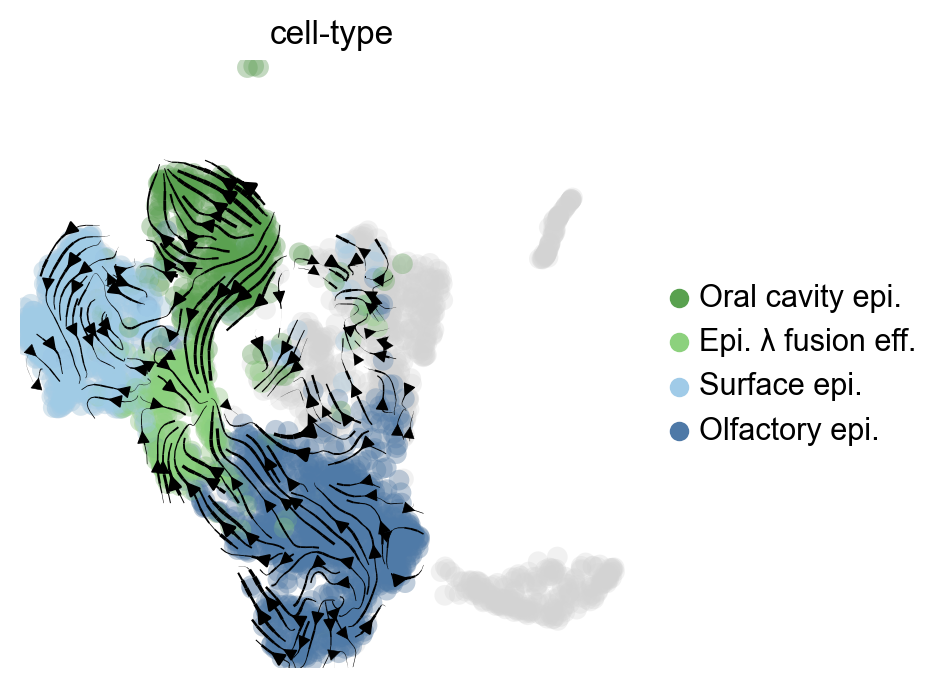

In [9]:
scv.set_figure_params(figsize=(4,4))
scv.pl.velocity_embedding_stream(adata,color="cell-type",legend_loc="right",
                                 groups=["Oral cavity epi.","Epi. λ fusion eff.","Surface epi.","Olfactory epi."])

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


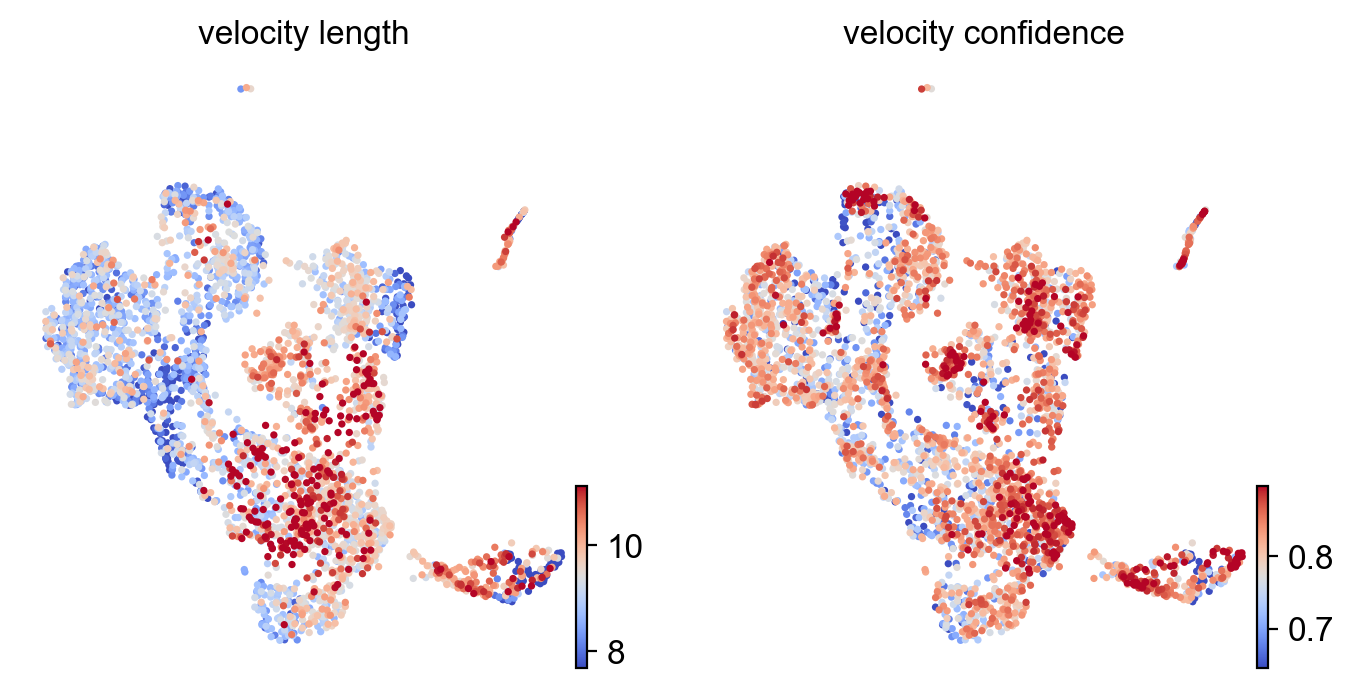

In [10]:
scv.set_figure_params(figsize=(4,4))
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

## Cluster to cluster transition evaluation

In [11]:
adata.layers["velocity"][np.isnan(adata.layers["velocity"])]=0


In [12]:
res_ML6=evaluate(adata,[("Oral cavity epi.","Epi. λ fusion eff."),
                        ("Surface epi.","Epi. λ fusion eff."),
                        ("Olfactory epi.","Epi. λ fusion eff.")],
                 "cell-type","velocity")

# Cross-Boundary Transition Score (A->B)
{('Oral cavity epi.', 'Epi. λ fusion eff.'): 0.11801818, ('Surface epi.', 'Epi. λ fusion eff.'): 0.07033604, ('Olfactory epi.', 'Epi. λ fusion eff.'): 0.11289195}
Total Mean: 0.10041538625955582
# Cross-Boundary Velocity Coherence (A->B)
{('Oral cavity epi.', 'Epi. λ fusion eff.'): 0.6545114841531662, ('Surface epi.', 'Epi. λ fusion eff.'): 0.7329105021727862, ('Olfactory epi.', 'Epi. λ fusion eff.'): 0.7457422587261411}
Total Mean: 0.7110547483506977
# Cross-Boundary Direction Correctness (A->B)
{('Oral cavity epi.', 'Epi. λ fusion eff.'): 0.13796779166192388, ('Surface epi.', 'Epi. λ fusion eff.'): -0.17031330715916426, ('Olfactory epi.', 'Epi. λ fusion eff.'): 0.5094093671088237}
Total Mean: 0.15902128387052775
# In-cluster Coherence
{'Epi. λ fusion eff.': 0.7745942405500673, 'Erythrocytes': 0.9578900214025411, 'Forebrain epi. A': 0.9737527512306784, 'Forebrain epi. B': 0.8334364087138171, 'Mesenchymes': 0.7877804483679695, 'NCC': 0.933124978

In [13]:
adata_ML6=adata.copy()

# Velocity of WT dataset

In [14]:
adata=adata_all[adata_all.obs.batch=="ML7"]

## Feature filtering

In [15]:
scv.pp.filter_and_normalize(adata, min_counts=20, min_counts_u=10, n_top_genes=5000)

Trying to set attribute `.obs` of view, copying.


Filtered out 41239 genes that are detected 20 counts (spliced).
Filtered out 2541 genes that are detected 10 counts (unspliced).
Normalized count data: X, spliced, unspliced.
Extracted 5000 highly variable genes.
Logarithmized X.


## Velocity modelling

In [16]:
scv.pp.moments(adata,n_neighbors=20)
scv.tl.velocity(adata)

computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:09)
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [17]:
scv.tl.recover_dynamics(adata,n_jobs=70)

recovering dynamics (using 70/88 cores)


  0%|          | 0/521 [00:00<?, ?gene/s]

    finished (0:00:19) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [18]:
scv.tl.velocity(adata,mode="dynamical")

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [19]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Velocity plotting

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


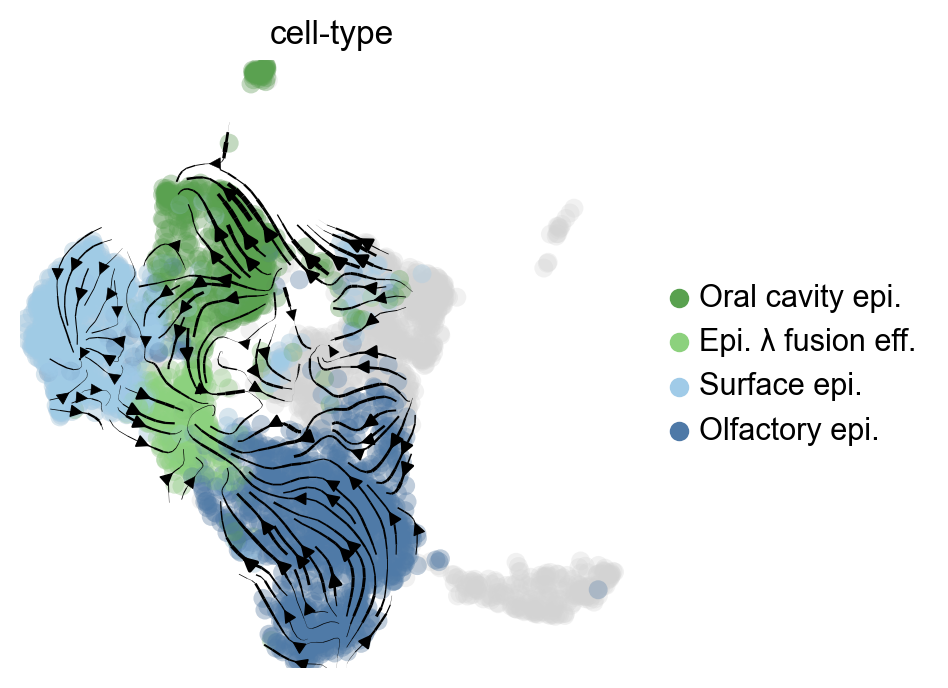

In [20]:
scv.pl.velocity_embedding_stream(adata,color="cell-type",legend_loc="right",
                                 groups=["Oral cavity epi.","Epi. λ fusion eff.","Surface epi.","Olfactory epi."])

In [21]:
scv.tl.terminal_states(adata,eps=0.1)

computing terminal states
    identified 3 regions of root cells and 4 regions of end points .
    finished (0:00:03) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


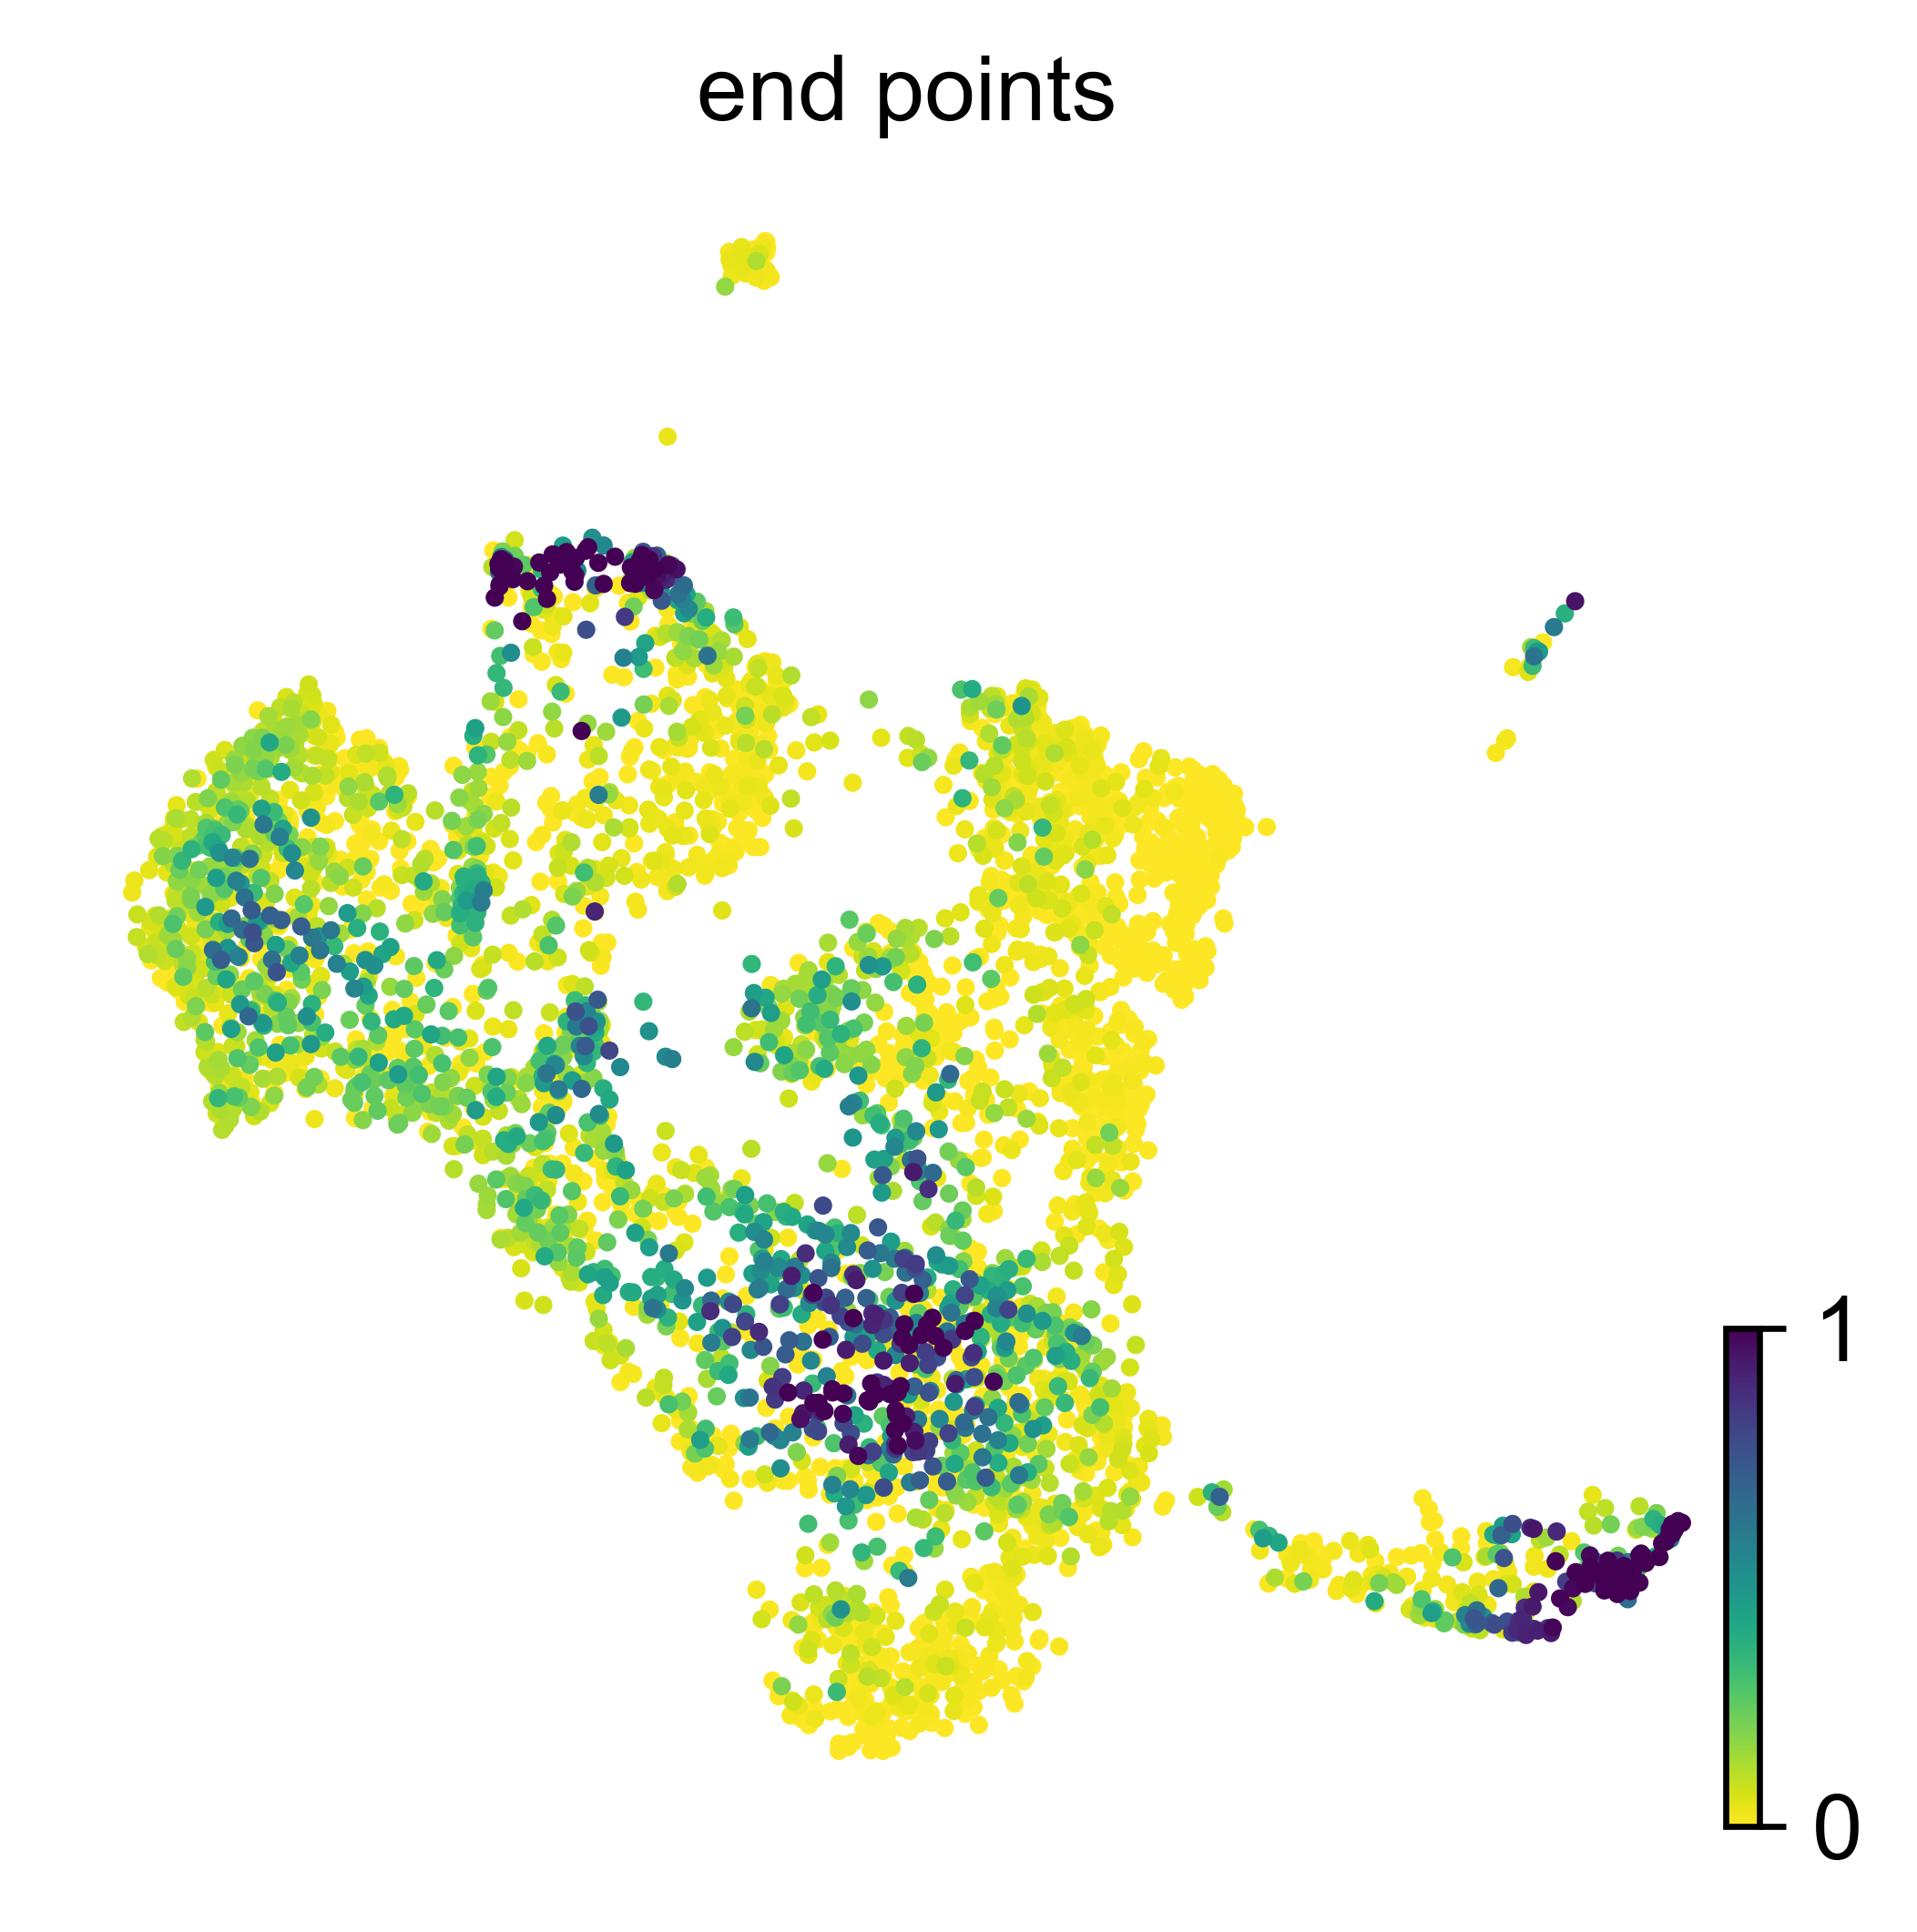

In [22]:
scv.pl.scatter(adata, color='end_points',dpi=300,figsize=[4,4])

In [23]:
scv.tl.terminal_states(adata_ML6,eps=0.1)

computing terminal states
    identified 6 regions of root cells and 6 regions of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


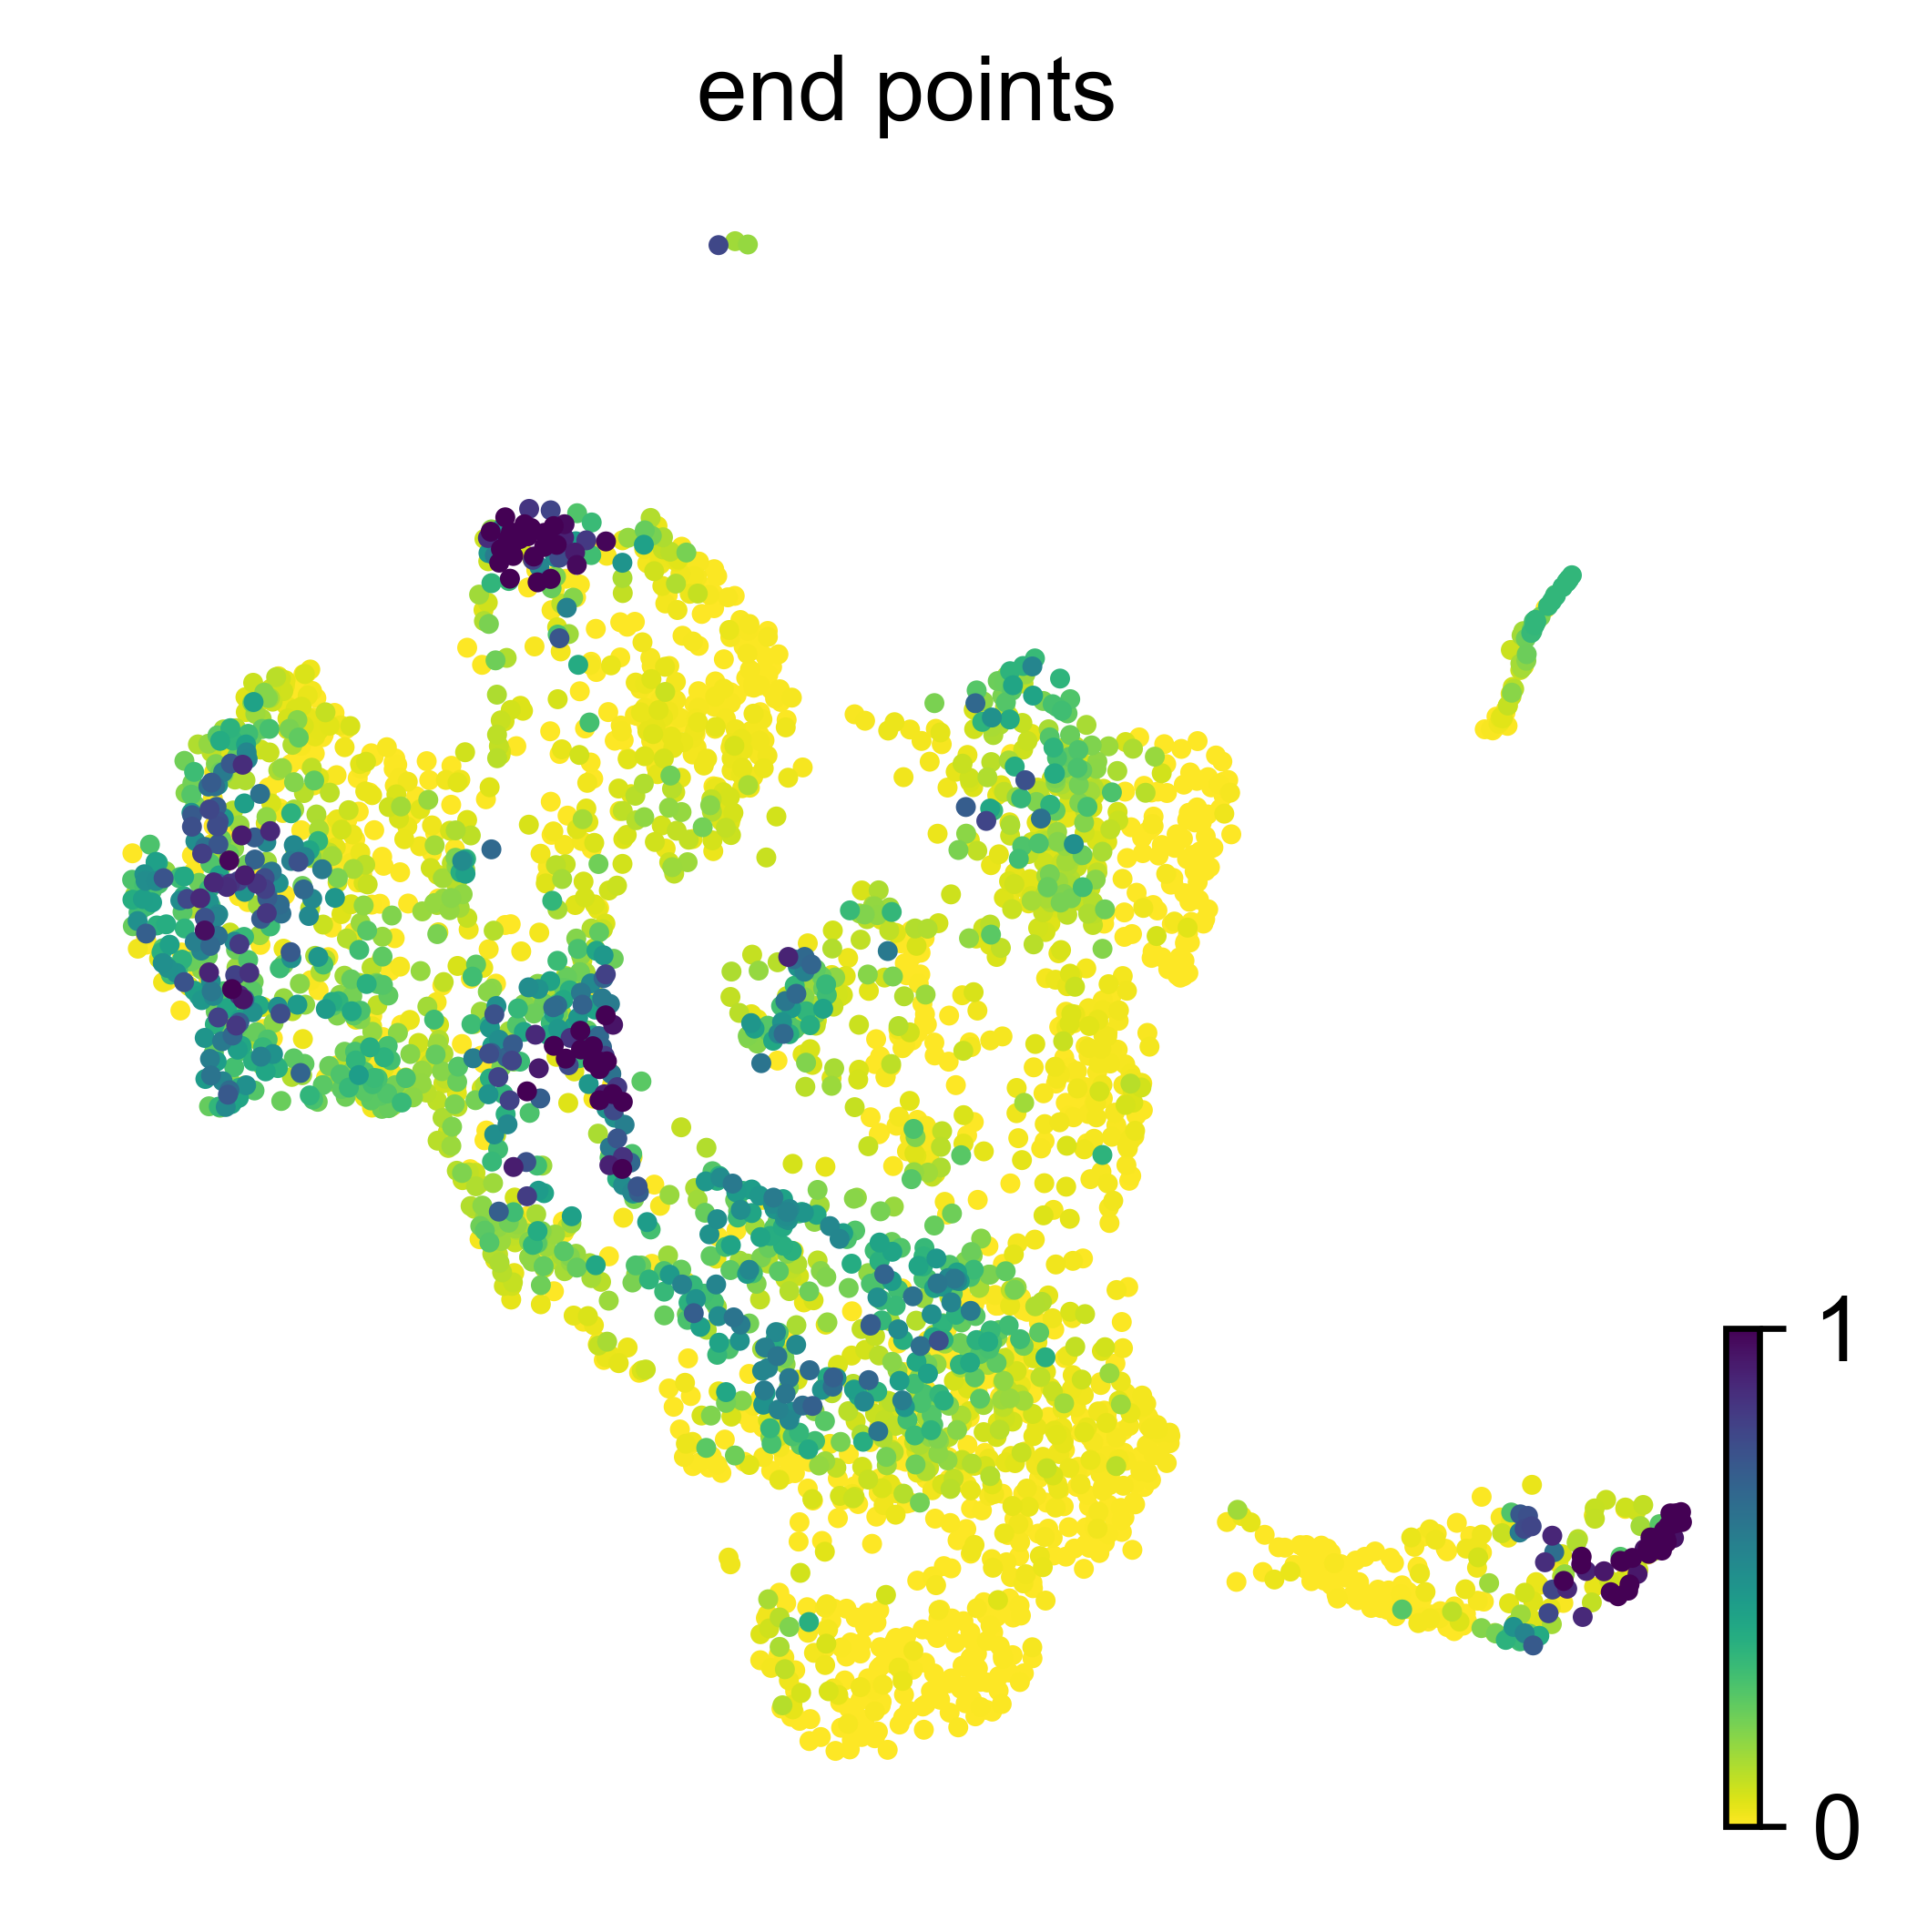

In [24]:
scv.pl.scatter(adata_ML6, color=['end_points'],dpi=300,figsize=[4,4])

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


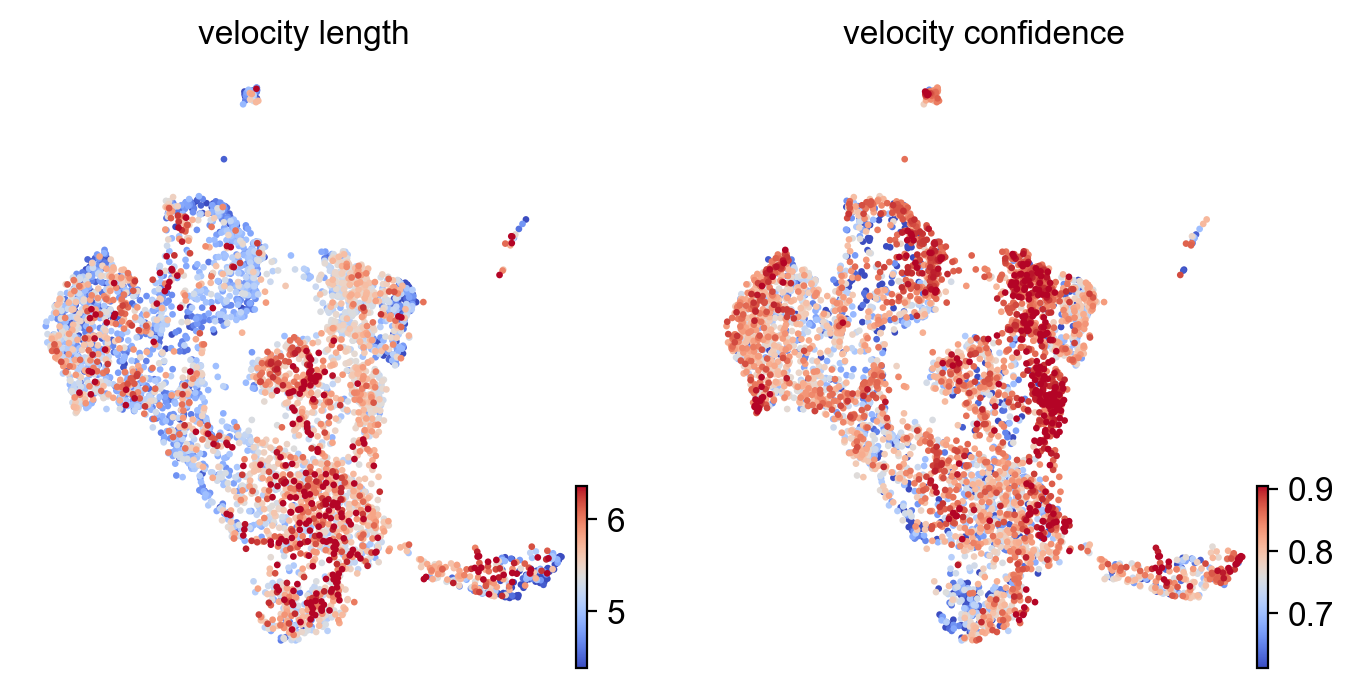

In [25]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

## Cluster to cluster transition evaluation

In [26]:
adata.layers["velocity"][np.isnan(adata.layers["velocity"])]=0

In [27]:
res_ML7=evaluate(adata,[("Oral cavity epi.","Epi. λ fusion eff."),
                        ("Surface epi.","Epi. λ fusion eff."),
                        ("Olfactory epi.","Epi. λ fusion eff.")],
                 "cell-type","velocity")

# Cross-Boundary Transition Score (A->B)
{('Oral cavity epi.', 'Epi. λ fusion eff.'): 0.1862776, ('Surface epi.', 'Epi. λ fusion eff.'): 0.1443233, ('Olfactory epi.', 'Epi. λ fusion eff.'): 0.18607937}
Total Mean: 0.17222677171230316
# Cross-Boundary Velocity Coherence (A->B)
{('Oral cavity epi.', 'Epi. λ fusion eff.'): 0.6656329729891517, ('Surface epi.', 'Epi. λ fusion eff.'): 0.6696887642771805, ('Olfactory epi.', 'Epi. λ fusion eff.'): 0.6992058515840471}
Total Mean: 0.6781758629501264
# Cross-Boundary Direction Correctness (A->B)
{('Oral cavity epi.', 'Epi. λ fusion eff.'): 0.13082519422183345, ('Surface epi.', 'Epi. λ fusion eff.'): 0.11464733364823954, ('Olfactory epi.', 'Epi. λ fusion eff.'): 0.5289427842961177}
Total Mean: 0.25813843738873027
# In-cluster Coherence
{'Cartilage proge.': 0.9999999999999998, 'Epi. λ fusion eff.': 0.7818731249521702, 'Erythrocytes': 0.9245444344923694, 'Forebrain epi. A': 0.9247899766912653, 'Forebrain epi. B': 0.8161589839804478, 'Mesenchymes': 0

# Comparing Mutant vs WT Cross-Boundary Direction Correctness

## Intial plot

In [28]:
import seaborn as sns

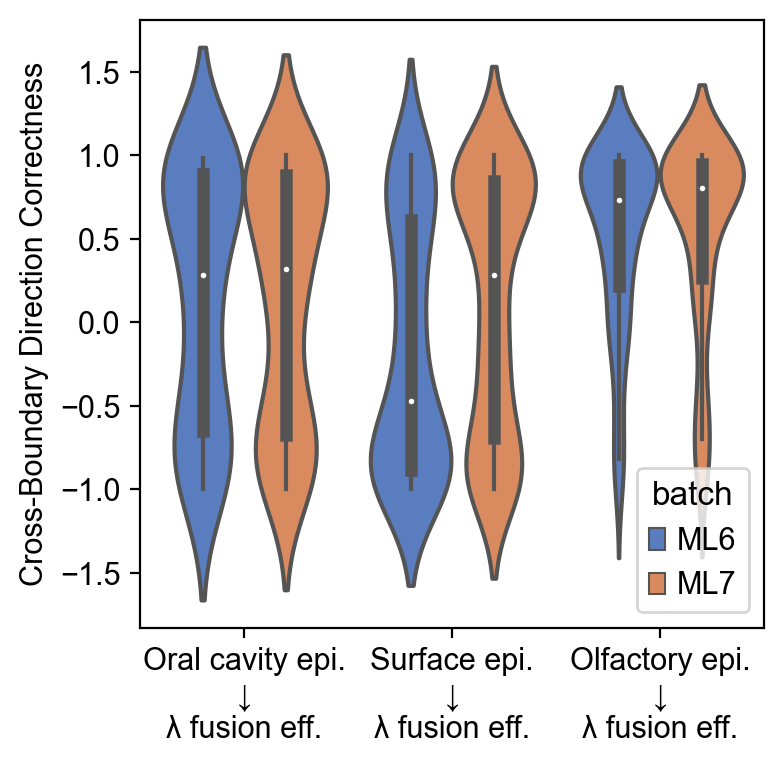

In [29]:
CBT=res_ML6['Cross-Boundary Direction Correctness (A->B)']
df_ML6=pd.concat([pd.DataFrame({"transi":"\n↓\n".join(t),"val":CBT[t]}) for t in list(CBT.keys())])
df_ML6.reset_index(drop=True,inplace=True)
df_ML6["batch"]="ML6"

CBT=res_ML7['Cross-Boundary Direction Correctness (A->B)']
df_ML7=pd.concat([pd.DataFrame({"transi":"\n↓\n".join(t),"val":CBT[t]}) for t in list(CBT.keys())])
df_ML7.reset_index(drop=True,inplace=True)
df_ML7["batch"]="ML7"
df=pd.concat([df_ML6,df_ML7])
df.transi=df.transi.str.replace("Epi. ","")
ax = sns.violinplot(x="transi", y="val", hue="batch",data=df, palette="muted")
ax.set_ylabel("Cross-Boundary Direction Correctness")
ax.xaxis.label.set_visible(False)

## Wilcoxon rank-sum testing

In [30]:
from scipy.stats import ranksums

In [31]:
ranksums(df.loc[(df.transi=="Oral cavity epi.\n↓\nλ fusion eff.") & (df.batch=="ML6")].val,
         df.loc[(df.transi=="Oral cavity epi.\n↓\nλ fusion eff.") & (df.batch=="ML7")].val)

RanksumsResult(statistic=0.0920331616882521, pvalue=0.9266716921727552)

In [32]:
ranksums(df.loc[(df.transi=="Surface epi.\n↓\nλ fusion eff.") & (df.batch=="ML6")].val,
         df.loc[(df.transi=="Surface epi.\n↓\nλ fusion eff.") & (df.batch=="ML7")].val)

RanksumsResult(statistic=-2.9254363911614663, pvalue=0.0034397348851189537)

In [33]:
ranksums(df.loc[(df.transi=="Olfactory epi.\n↓\nλ fusion eff.") & (df.batch=="ML6")].val,
         df.loc[(df.transi=="Olfactory epi.\n↓\nλ fusion eff.") & (df.batch=="ML7")].val)

RanksumsResult(statistic=-0.7960417167205374, pvalue=0.42600778856996224)

## Final plotting with test result

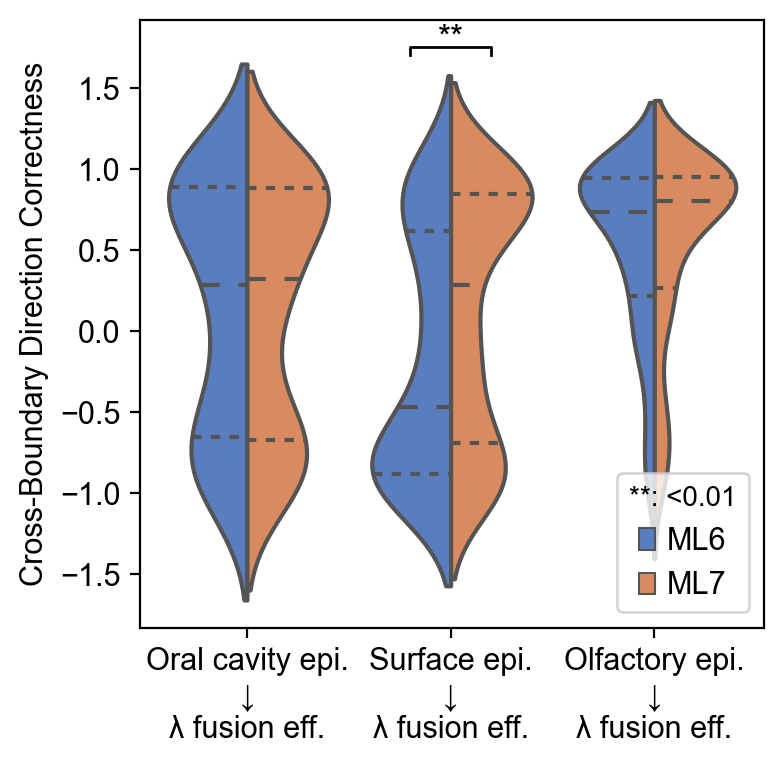

In [34]:
ax = sns.violinplot(x="transi", y="val", hue="batch",data=df, palette="muted",split=True,inner="quartile")
ax.set_ylabel("Cross-Boundary Direction Correctness")
ax.xaxis.label.set_visible(False)
#ax.set_xlim([ax.get_xlim()[0],2.8])
col="k"
h=.05

x1, x2 = -0.20, 0.20
x1,x2=x1+1,x2+1
y=df.loc[(df.transi=="Surface epi.\n↓\nλ fusion eff."),"val"].max()+df.loc[(df.transi=="Surface epi.\n↓\nλ fusion eff."),"val"].max()*.7

ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
ax.text((x1+x2)*.5, y+h, "**", ha="center", color=col)

ax.legend(title='**: <0.01',title_fontsize=10,loc="lower right")

## Show boundary cells used for CBD calculation

In [35]:
def plot_CBD_selections(adata,u,v,highlight=False,**kwargs):
    x_emb="X_umap"
    k_velocity="velocity"
    k_cluster = "leiden"
    scores = {}
    all_scores = {}

    x_emb = adata.obsm[x_emb]
    if x_emb == "X_umap":
        v_emb = adata.obsm['{}_umap'.format(k_velocity)]
    else:
        v_emb = adata.obsm[[key for key in adata.obsm if key.startswith(k_velocity)][0]]
        
    sel = adata.obs[k_cluster] == u
    nbs = adata.uns['neighbors']['indices'][sel] # [n * 30]

    boundary_nodes = map(lambda nodes:keep_type(adata, nodes, v, k_cluster), nbs)
    x_points = x_emb[sel]
    x_velocities = v_emb[sel]

    type_score = []
    
    boundary_nodes=np.array(list(boundary_nodes))
    adata.obs["sel"]="None"
    adata.obs.loc[adata[adata.obs.leiden==u].obs_names[np.argwhere([len(b) != 0 for b in list(boundary_nodes)]).ravel()],
                  "sel"]="from_"+u
    adata.obs.loc[adata.obs_names[np.concatenate(boundary_nodes[[len(b) != 0 for b in list(boundary_nodes)]])],
                  "sel"]="to_"+v
    adata.obs.sel=adata.obs.sel.astype("category")
    adata.obs.sel=adata.obs.sel.cat.reorder_categories(["from_"+u,"to_"+v,"None"])
    ax=None
    sel=adata.obs_names
    if highlight:
        ax=sc.pl.umap(adata,show=False)
        sel = adata[adata.obs.sel.isin(["from_"+u,"to_"+v])].obs_names
    sc.pl.umap(adata[sel],color="sel",groups=["from_"+u,"to_"+v],
               palette=[np.array(adata.uns["leiden_colors"])[adata.obs.leiden.cat.categories==c][0] for c in [u,v]]+["k"],
               ax=ax,add_outline=highlight,**kwargs)

Trying to set attribute `.uns` of view, copying.


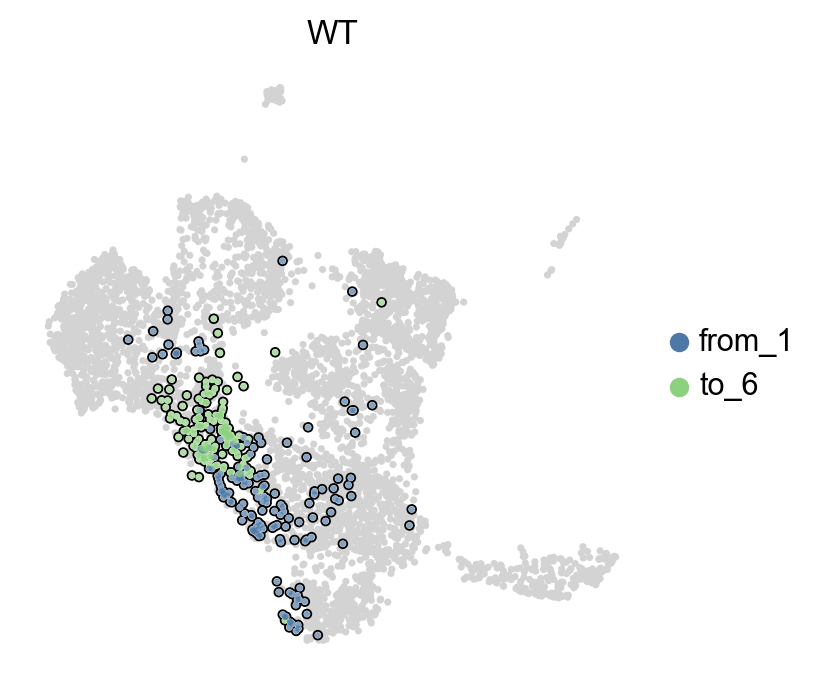

Trying to set attribute `.uns` of view, copying.


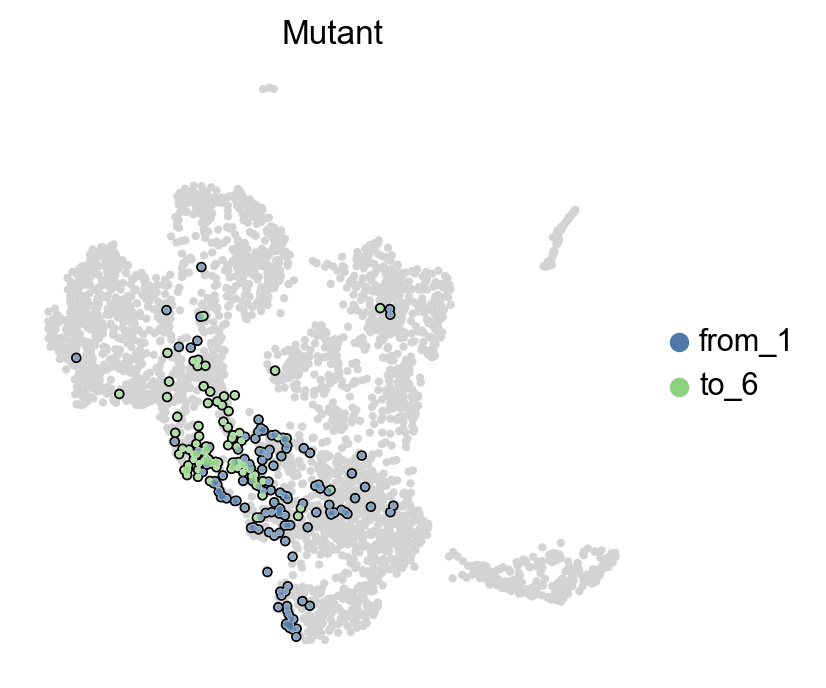

In [35]:
plot_CBD_selections(adata,"1","6",highlight=True,s=20,title="WT",frameon=False)
plot_CBD_selections(adata_ML6,"1","6",highlight=True,s=20,title="Mutant",frameon=False)

Trying to set attribute `.uns` of view, copying.


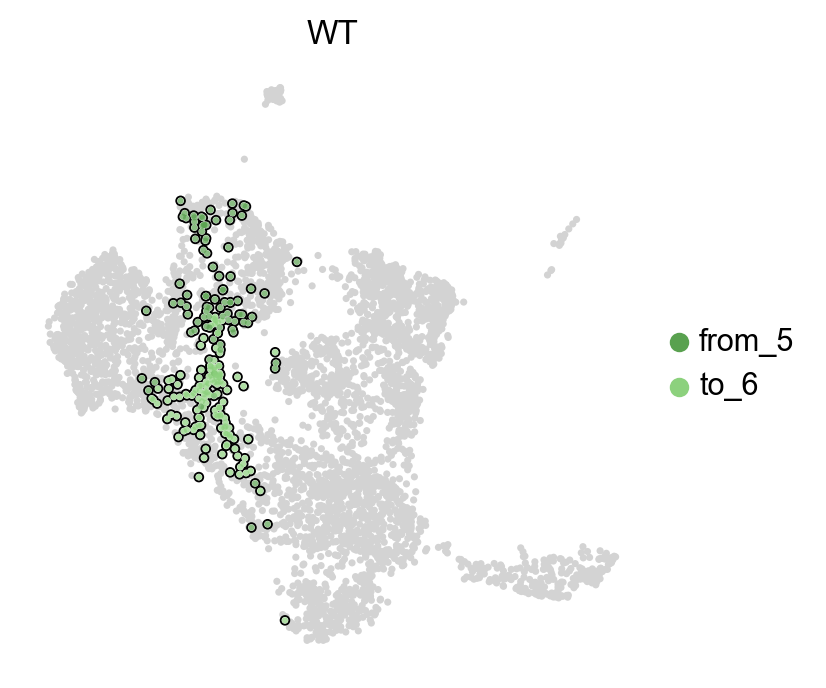

Trying to set attribute `.uns` of view, copying.


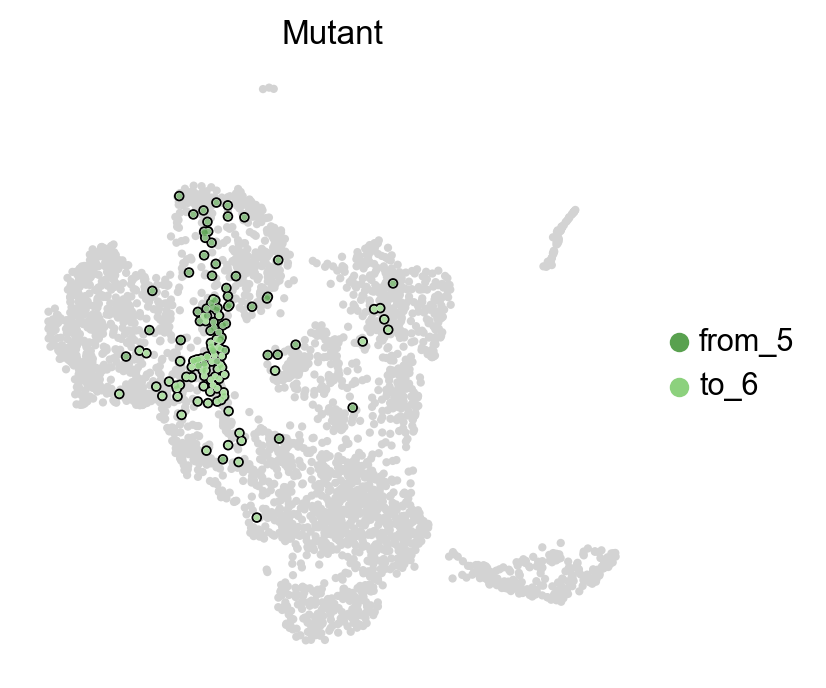

In [36]:
plot_CBD_selections(adata,"5","6",highlight=True,s=20,title="WT",frameon=False)
plot_CBD_selections(adata_ML6,"5","6",highlight=True,s=20,title="Mutant",frameon=False)

Trying to set attribute `.uns` of view, copying.


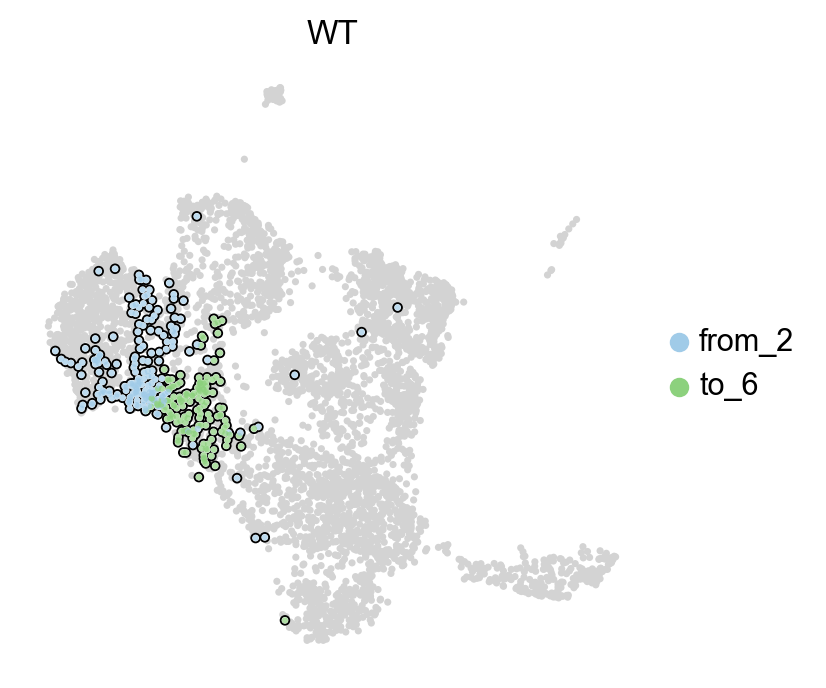

Trying to set attribute `.uns` of view, copying.


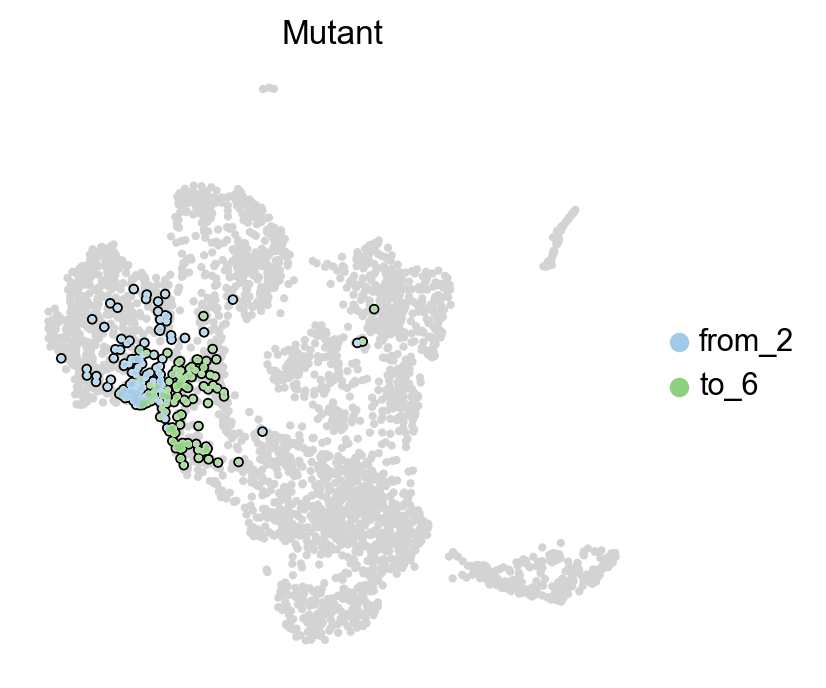

In [37]:
plot_CBD_selections(adata,"2","6",highlight=True,s=20,title="WT",frameon=False)
plot_CBD_selections(adata_ML6,"2","6",highlight=True,s=20,title="Mutant",frameon=False)